In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("book1-100k.csv")
# print(df.head())
# df.shape

'''
for index,row in df.iterrows():
    print(f"{row['Name']} has a rating of {row['Rating']} based on {row['CountsOfReview']} reviews.")
    if index > 10:
        break

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


print('Shape of the dataset ',df.shape)
print('Columns',df.columns.tolist())

print('Missing Nulls\n',df.isnull().sum())
print('\n---DESCRIPTIVE STATS---\n')
print(df.describe(include='all'))
print('\n Duplicated Rows\n')
print(df.duplicated().sum())
'''

'\nfor index,row in df.iterrows():\n    print(f"{row[\'Name\']} has a rating of {row[\'Rating\']} based on {row[\'CountsOfReview\']} reviews.")\n    if index > 10:\n        break\n\nsns.set(style="whitegrid")\nplt.rcParams[\'figure.figsize\'] = (10,6)\n\n\nprint(\'Shape of the dataset \',df.shape)\nprint(\'Columns\',df.columns.tolist())\n\nprint(\'Missing Nulls\n\',df.isnull().sum())\nprint(\'\n---DESCRIPTIVE STATS---\n\')\nprint(df.describe(include=\'all\'))\nprint(\'\n Duplicated Rows\n\')\nprint(df.duplicated().sum())\n'

Publisher
Vintage                      331905
Penguin Books                308223
Little, Brown and Company    184403
Harper Perennial             145022
Alfred A. Knopf              144838
Name: CountsOfReview, dtype: int64


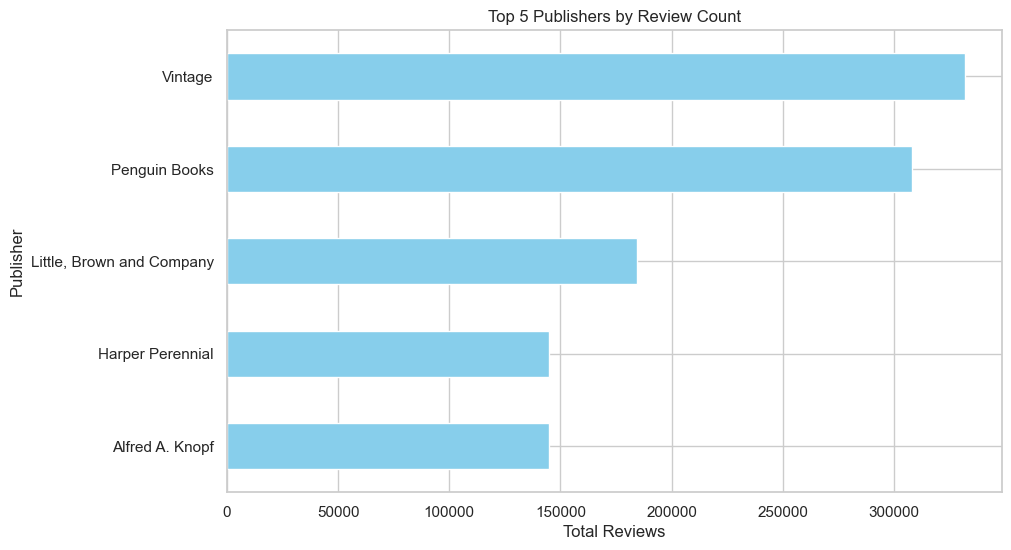

In [8]:
publisher_reviews = df.groupby('Publisher')['CountsOfReview'].sum().sort_values(ascending=False)
print(publisher_reviews.head())

publisher_reviews.head(5).plot(kind='barh', color='skyblue')
plt.xlabel("Total Reviews")
plt.title("Top 5 Publishers by Review Count")
plt.gca().invert_yaxis()
plt.show()


-----------Distributions-----------


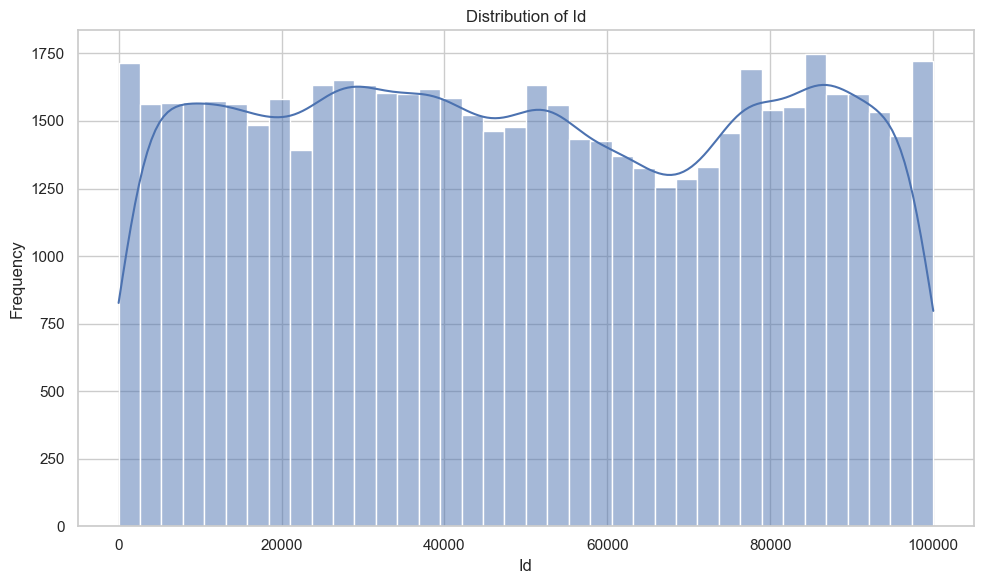

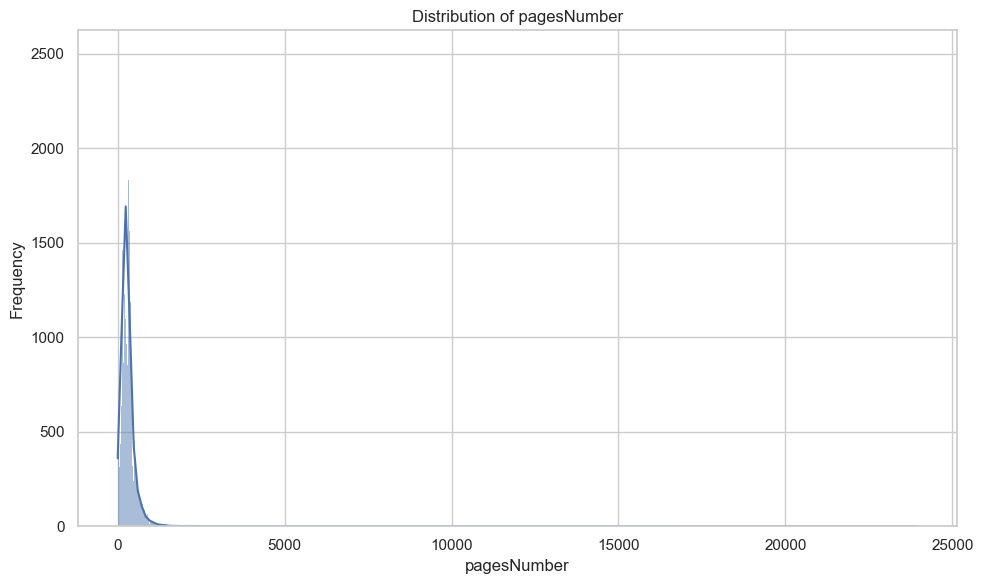

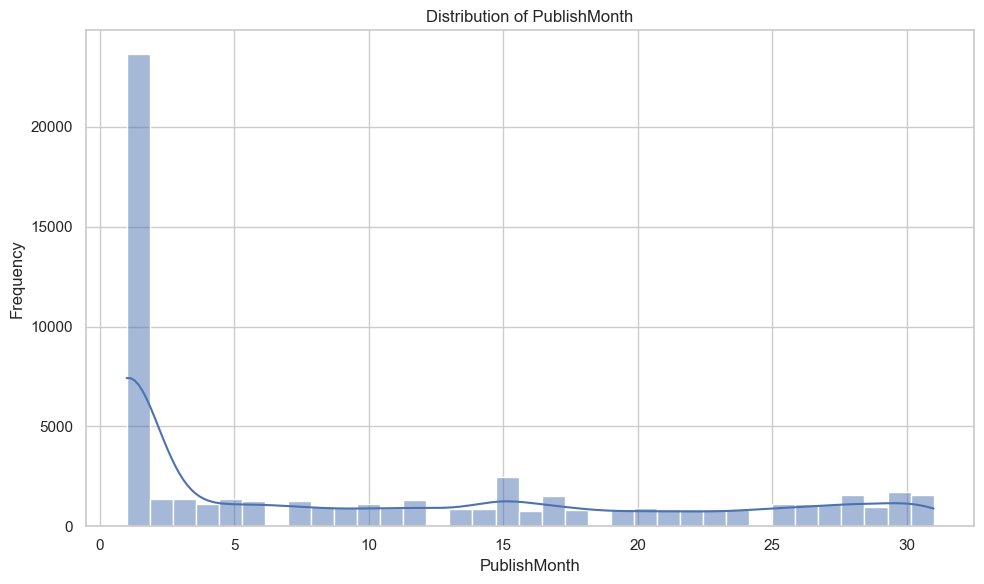

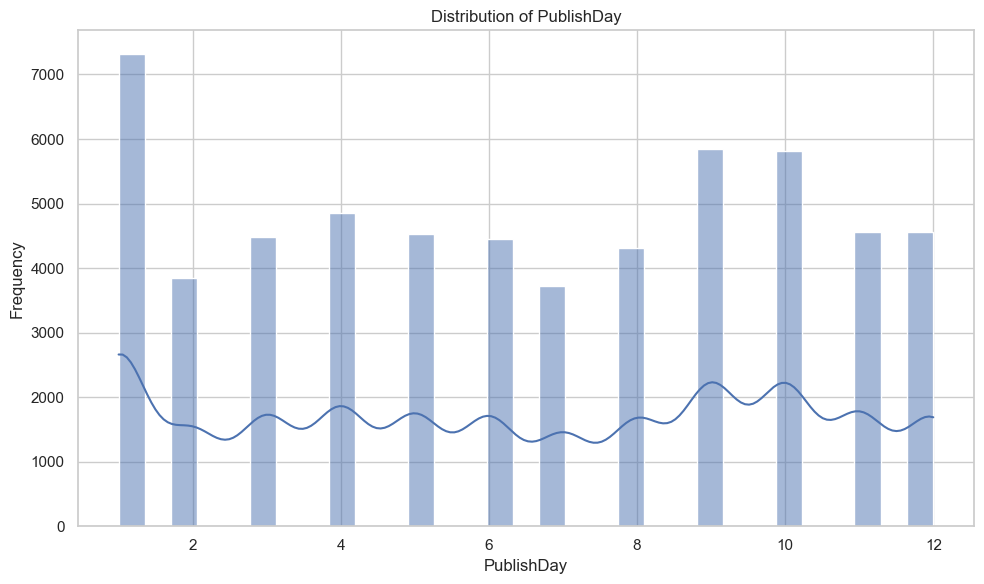

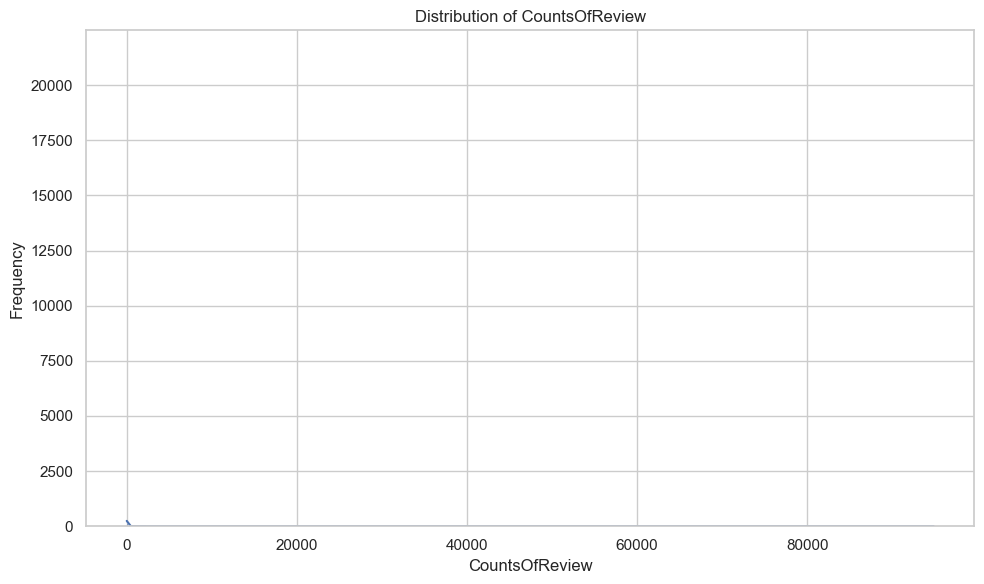

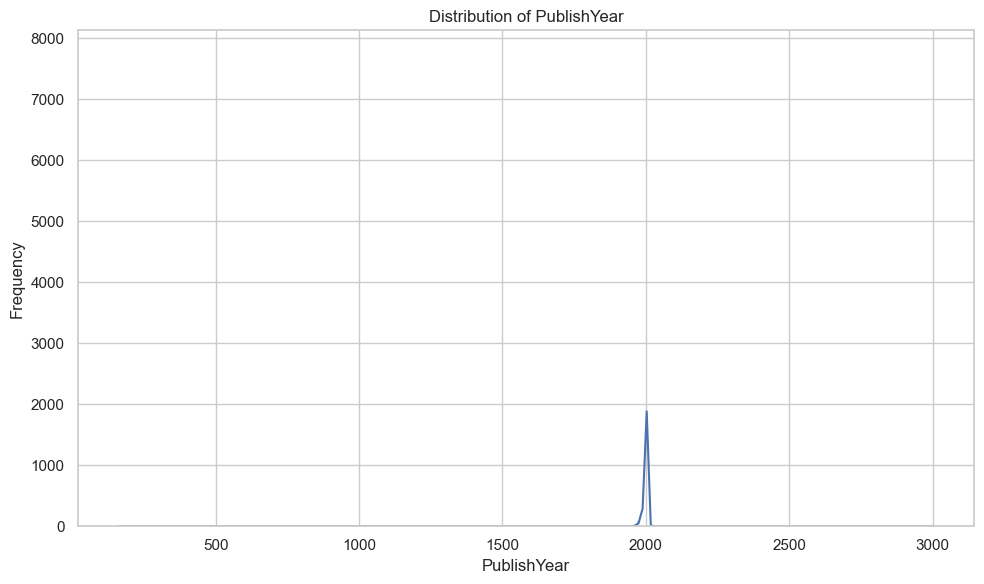

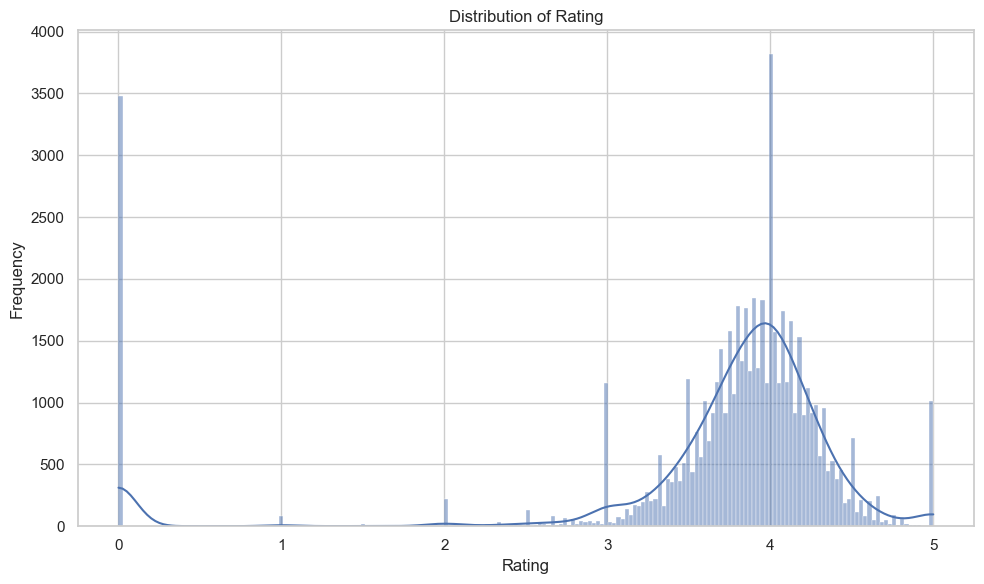

'\nprint("\n----- CATEGORICAL VALUE COUNTS -----------")\ncat_cols = df.select_dtypes(include=\'object\').columns\nfor col in cat_cols:\n    print(f"\n{col}:\n",df[col].value_counts())\n'

In [4]:
'''
print('\n----Correlation Matrix---')
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
'''

print('\n-----------Distributions-----------')
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

'''
print("\n----- CATEGORICAL VALUE COUNTS -----------")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}:\n",df[col].value_counts())
'''

In [ ]:
subset_pub = df[df['Publisher'] == 'Vintage']

# print(subset_pub.head())

author_counts = subset_pub['Authors'].value_counts().head(10)

author_counts.plot(kind='barh', title='Top Authors under Vintage Publisher')
plt.xlabel('Number Of Books')
plt.ylabel('Author')
plt.show()


In [ ]:
# Group By Author and Publisher, count books
import seaborn as sns
author_publisher_counts = df.groupby(['Authors','Publisher']).size().reset_index(name='BookCount')

# Filter for authors who appear under more than one publisher
multi_pub_authors = author_publisher_counts.groupby('Authors').filter(lambda x:x['Publisher'].nunique() > 1)

# Pivot for heatmap or grouped bar chart
pivot = multi_pub_authors.pivot(index='Authors',columns='Publisher',values='BookCount').fillna(0)

sns.set(style="whitegrid")
# Visualize HeatMap or Grouped Bar Chart
plt.figure(figsize=(12,8))
sns.heatmap(pivot,cmap="YlGnBu",linewidths=0.5)
plt.title('Authors who have books across Multiple Publishers')
plt.xlabel('Publisher')
plt.ylabel('Author')
plt.show()